In [1]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
Staph_data4 = pd.read_csv('Staph_data4_bioactivity.csv')
Staph_data4

,mol_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,8.00,active
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,16.00,active
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,151356.12,inactive
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,11748975.55,inactive
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,4786300.92,inactive
...,...,...,...,...
1582,CHEMBL4852152,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive
1583,CHEMBL4873325,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive
1584,CHEMBL4864142,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive
1585,CHEMBL4869593,CC1(C)C=C2C3=CC(=O)[C@@H]4[C@@]5(C)C[C@@H](O)[...,64000.00,inactive


In [3]:
 #Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors


In [4]:
df_lipinski = lipinski(Staph_data4.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,506.242,5.41390,4.0,5.0
1,376.287,4.42670,3.0,3.0
2,287.227,2.81260,0.0,6.0
3,293.662,3.44290,1.0,5.0
4,315.281,3.31762,0.0,6.0
...,...,...,...,...
1582,518.691,3.32660,5.0,6.0
1583,518.691,3.32660,5.0,6.0
1584,518.691,3.32660,5.0,6.0
1585,500.676,4.27590,4.0,5.0


In [5]:
Staph_data_lip = pd.concat([Staph_data4,df_lipinski], axis=1)
Staph_data_lip 

,mol_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,8.00,active,506.242,5.41390,4.0,5.0
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,16.00,active,376.287,4.42670,3.0,3.0
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,151356.12,inactive,287.227,2.81260,0.0,6.0
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,11748975.55,inactive,293.662,3.44290,1.0,5.0
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,4786300.92,inactive,315.281,3.31762,0.0,6.0
...,...,...,...,...,...,...,...,...
1582,CHEMBL4852152,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0
1583,CHEMBL4873325,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0
1584,CHEMBL4864142,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0
1585,CHEMBL4869593,CC1(C)C=C2C3=CC(=O)[C@@H]4[C@@]5(C)C[C@@H](O)[...,64000.00,inactive,500.676,4.27590,4.0,5.0


In [6]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [7]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x


In [8]:
df_norm = norm_value(Staph_data_lip)
df_norm.to_csv('Staph_data_norm.csv', index=False)

/tmp/ipykernel_17696/1998879194.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


In [9]:
df_final = pIC50(Staph_data_lip)
df_final

/tmp/ipykernel_17696/911978885.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,mol_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,8.00,active,506.242,5.41390,4.0,5.0,8.09691
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,16.00,active,376.287,4.42670,3.0,3.0,7.79588
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,151356.12,inactive,287.227,2.81260,0.0,6.0,3.82000
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,11748975.55,inactive,293.662,3.44290,1.0,5.0,1.93000
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,4786300.92,inactive,315.281,3.31762,0.0,6.0,2.32000
...,...,...,...,...,...,...,...,...,...
1582,CHEMBL4852152,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0,4.19382
1583,CHEMBL4873325,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0,4.19382
1584,CHEMBL4864142,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0,4.19382
1585,CHEMBL4869593,CC1(C)C=C2C3=CC(=O)[C@@H]4[C@@]5(C)C[C@@H](O)[...,64000.00,inactive,500.676,4.27590,4.0,5.0,4.19382


In [10]:
df_final.to_csv('Staph_data_final.csv', index=False)

In [11]:
Staph_data5 = df_final
Staph_data5

,mol_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,8.00,active,506.242,5.41390,4.0,5.0,8.09691
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,16.00,active,376.287,4.42670,3.0,3.0,7.79588
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,151356.12,inactive,287.227,2.81260,0.0,6.0,3.82000
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,11748975.55,inactive,293.662,3.44290,1.0,5.0,1.93000
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,4786300.92,inactive,315.281,3.31762,0.0,6.0,2.32000
...,...,...,...,...,...,...,...,...,...
1582,CHEMBL4852152,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0,4.19382
1583,CHEMBL4873325,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0,4.19382
1584,CHEMBL4864142,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0,4.19382
1585,CHEMBL4869593,CC1(C)C=C2C3=CC(=O)[C@@H]4[C@@]5(C)C[C@@H](O)[...,64000.00,inactive,500.676,4.27590,4.0,5.0,4.19382


In [12]:
Staph_data5 = df_final[df_final['bioactivity_class'] != 'intermediate']
Staph_data5.to_csv('Staph_data5_final_pIC50.csv')
Staph_data5


,mol_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL304237,Oc1cc(NCCCNC2CCNc3c(Br)cc(Br)cc32)nc2ccccc12,8.00,active,506.242,5.41390,4.0,5.0,8.09691
1,CHEMBL60402,O=c1cc(NCCCNCc2ccc(Cl)c(Cl)c2)[nH]c2ccccc12,16.00,active,376.287,4.42670,3.0,3.0,7.79588
2,CHEMBL122734,COc1ccc2c(c1)C(=O)/C(=C/c1ccc([N+](=O)[O-])o1)O2,151356.12,inactive,287.227,2.81260,0.0,6.0,3.82000
3,CHEMBL122837,O=C(/C=C/c1ccc([N+](=O)[O-])o1)c1cc(Cl)ccc1O,11748975.55,inactive,293.662,3.44290,1.0,5.0,1.93000
4,CHEMBL331082,CC(=O)Oc1ccc(C)cc1C(=O)/C=C/c1ccc([N+](=O)[O-])o1,4786300.92,inactive,315.281,3.31762,0.0,6.0,2.32000
...,...,...,...,...,...,...,...,...,...
1582,CHEMBL4852152,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0,4.19382
1583,CHEMBL4873325,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0,4.19382
1584,CHEMBL4864142,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC(=O)[C@@H]...,64000.00,inactive,518.691,3.32660,5.0,6.0,4.19382
1585,CHEMBL4869593,CC1(C)C=C2C3=CC(=O)[C@@H]4[C@@]5(C)C[C@@H](O)[...,64000.00,inactive,500.676,4.27590,4.0,5.0,4.19382


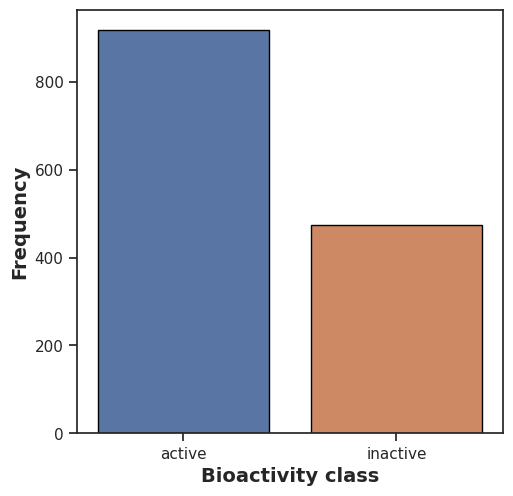

In [13]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=Staph_data5, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

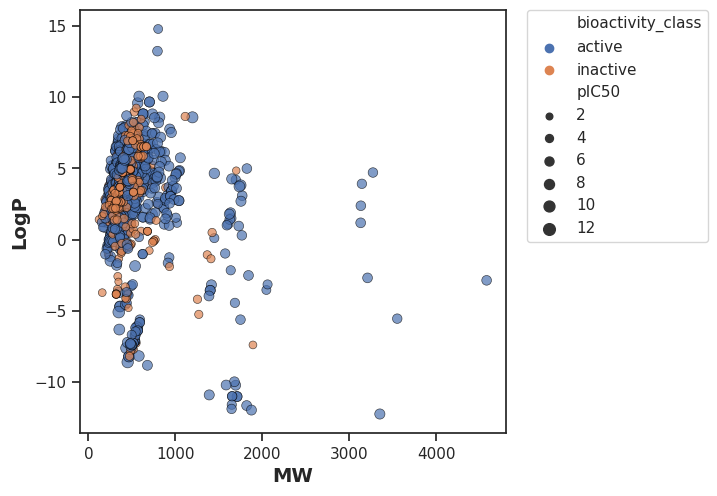

In [14]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=Staph_data5, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

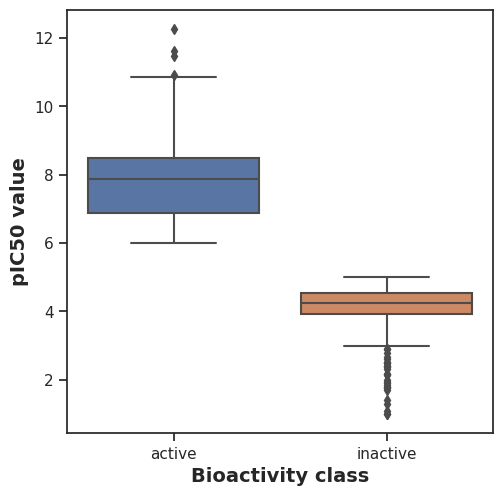

In [15]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = Staph_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [16]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = Staph_data5[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = Staph_data5[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [17]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,436050.0,4.113158e-206,0.05,Different distribution (reject H0)


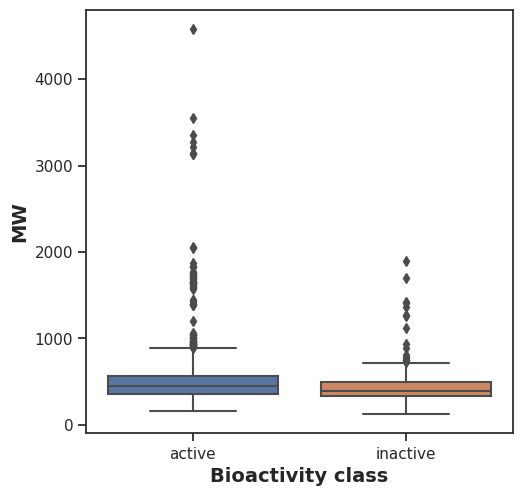

In [18]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = Staph_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')


In [19]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,256126.0,8.636200e-08,0.05,Different distribution (reject H0)


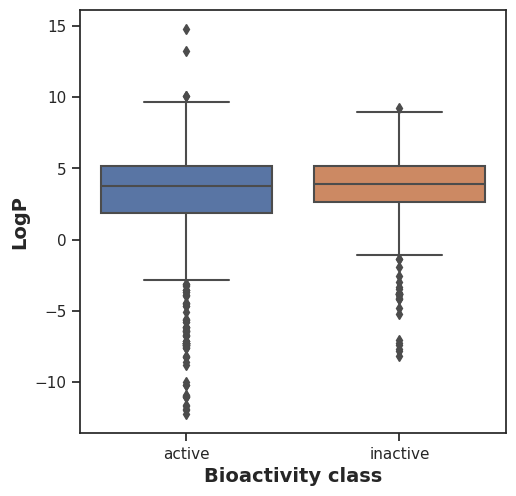

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = Staph_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [21]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,204045.5,0.049517,0.05,Different distribution (reject H0)


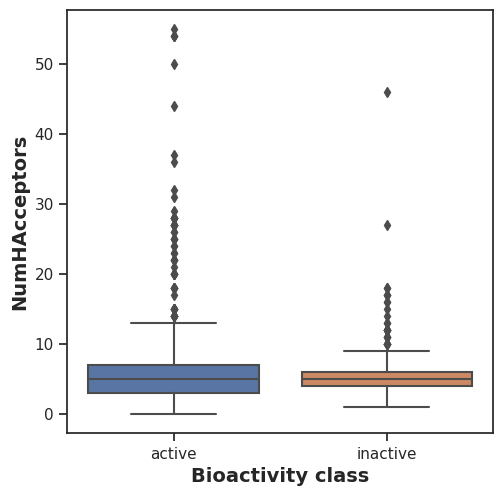

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = Staph_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [23]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,227118.0,0.197815,0.05,Same distribution (fail to reject H0)


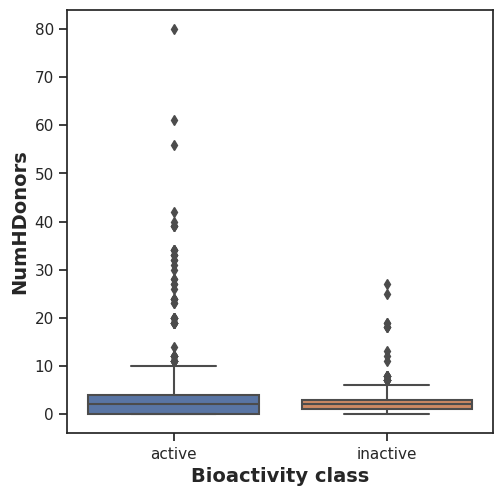

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = Staph_data5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [25]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,202649.5,0.028144,0.05,Different distribution (reject H0)


In [26]:
! zip -r results.zip . -i *.csv *.pdf

updating: Staph_data4_bioactivity.csv (deflated 83%)
updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: plot_MW_vs_LogP.pdf (deflated 3%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: plot_ic50.pdf (deflated 37%)
updating: Staph_data_final.csv (deflated 77%)
updating: Staph_data5_final_pIC50.csv (deflated 76%)
updating: plot_LogP.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 37%)
updating: Staph_data_bioactivity_data_raw.csv (deflated 93%)
updating: mannwhitneyu_MW.csv (deflated 7%)
updating: mannwhitneyu_pIC50.csv (deflated 11%)
updating: mannwhitneyu_LogP.csv (deflated 10%)
updating: Staph_data_norm.csv (deflated 79%)
updating: plot_MW.pdf (deflated 38%)
updating: descriptor_list.csv (deflated 95%)
updating: descriptors_output.csv (deflated 96%)
updating: Staph_pIC50_pubchem_fp.csv (deflated 96%)
updating: Staph_bioactivity_data.csv (deflate